In [14]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
import matplotlib.pyplot as plt
from fastf1.utils import delta_time
import matplotlib.colors as mcolors


In [15]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Bahrein Grand Prix', 'FP1')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




events      WARNING 	Correcting user input 'Bahrein Grand Prix' to 'Bahrain Grand Prix'
core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '5', '6', '7', '10'

In [16]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:18:44.577000,NOR,4,0 days 00:01:35.674000,2.0,1.0,NaT,NaT,0 days 00:00:30.195000,0 days 00:00:41.604000,...,True,McLaren,0 days 00:17:08.903000,2025-04-11 11:34:02.823,1,NaN,False,,False,True
3,0 days 00:23:13.251000,NOR,4,0 days 00:01:35.249000,4.0,1.0,NaT,NaT,0 days 00:00:30.109000,0 days 00:00:41.408000,...,True,McLaren,0 days 00:21:38.002000,2025-04-11 11:38:31.922,1,NaN,False,,False,True
6,0 days 00:36:35.324000,NOR,4,0 days 00:01:35.973000,7.0,2.0,NaT,NaT,0 days 00:00:30.128000,0 days 00:00:42.156000,...,False,McLaren,0 days 00:34:59.351000,2025-04-11 11:51:53.271,1,NaN,False,,False,True
8,0 days 00:41:04.072000,NOR,4,0 days 00:01:35.246000,9.0,2.0,NaT,NaT,0 days 00:00:30.193000,0 days 00:00:41.324000,...,False,McLaren,0 days 00:39:28.826000,2025-04-11 11:56:22.746,1,NaN,False,,False,True
11,0 days 00:58:37.147000,NOR,4,0 days 00:01:33.204000,12.0,3.0,NaT,NaT,0 days 00:00:29.546000,0 days 00:00:40.369000,...,True,McLaren,0 days 00:57:03.943000,2025-04-11 12:13:57.863,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0 days 01:06:03.936000,PIA,81,0 days 00:01:38.072000,18.0,4.0,NaT,NaT,0 days 00:00:31.335000,0 days 00:00:42.727000,...,False,McLaren,0 days 01:04:25.864000,2025-04-11 12:21:19.784,1,NaN,False,,False,True
419,0 days 01:07:42.855000,PIA,81,0 days 00:01:38.919000,19.0,4.0,NaT,NaT,0 days 00:00:31.456000,0 days 00:00:43.249000,...,False,McLaren,0 days 01:06:03.936000,2025-04-11 12:22:57.856,1,NaN,False,,False,True
420,0 days 01:09:21.984000,PIA,81,0 days 00:01:39.129000,20.0,4.0,NaT,NaT,0 days 00:00:31.182000,0 days 00:00:43.229000,...,False,McLaren,0 days 01:07:42.855000,2025-04-11 12:24:36.775,1,NaN,False,,False,True
423,0 days 01:14:38.290000,PIA,81,0 days 00:01:35.716000,23.0,5.0,NaT,NaT,0 days 00:00:30.629000,0 days 00:00:41.361000,...,False,McLaren,0 days 01:13:02.574000,2025-04-11 12:29:56.494,1,NaN,False,,False,True


In [17]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [18]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [19]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.
_plotting    WARNING 	Correcting invalid user input ' bulls' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.


In [20]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [21]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

In [22]:
# Replace these with your actual telemetry-framework imports:
# from telemetry import transformed_laps, circuit_info, interpolate_dataframe, session

import warnings

# ignore only the FastF1 deprecation warning about delta_time
warnings.filterwarnings(
    "ignore",
    message="`utils.delta_time` is considered deprecated.*",
    category=FutureWarning
)

class FastestLap:
    """
    Wraps a fastest-lap record and provides convenience accessors.
    Expects lap to have ['Driver','Sector1Time','Sector2Time'] and get_car_data().
    """
    def __init__(self, lap):
        self.name = lap['Driver']
        self.s1_time = lap['Sector1Time']
        self.s2_time = lap['Sector2Time']
        df = lap.get_car_data().add_distance()
        self.df = interpolate_dataframe(df)

    @property
    def sector_distances(self):
        d1 = self.df[self.df['Time'] <= self.s1_time]['Distance'].max()
        d2 = self.df[self.df['Time'] <= (self.s1_time + self.s2_time)]['Distance'].max()
        return d1, d2

def compute_acceleration(df):
    """
    Add longitudinal acceleration to telemetry DataFrame.
    Expects:
      - df['Speed'] in km/h
      - df['SessionTime'] as pandas Timedelta
    Returns df copy with new columns:
      - 'Speed_ms': speed in m/s
      - 'Sess_s'  : session time in seconds
      - 'Acc'     : longitudinal acceleration in m/s²
    """
    df = df.copy()
    df['Speed_ms'] = df['Speed'] / 3.6
    df['Sess_s']   = df['SessionTime'].dt.total_seconds()
    df['Acc']      = np.gradient(df['Speed_ms'], df['Sess_s'])
    return df

def compare_laps(drivers, channels=None, session_label="", driver_color_map=None):
    """
    Compare up to three drivers' fastest laps in a Jupyter notebook, including acceleration and delta-time.
    :param drivers: list of 1-3 driver codes, e.g. ['LEC', 'NOR', 'VER']
    :param channels: list of telemetry columns to plot
    :param session_label: optional session indicator (e.g. 'FP1')
    :param driver_color_map: dict mapping driver codes to matplotlib-compatible colors
    """
    if not (1 <= len(drivers) <= 3):
        raise ValueError("drivers list must contain 1 to 3 items")

    # Default channels
    default_channels = ['Speed', 'Throttle', 'Brake', 'RPM', 'nGear', 'DRS']
    channels = channels or default_channels

    units = {
        'Speed': 'km/h', 'Throttle': '%', 'Brake': '%', 'RPM': 'rpm',
        'nGear': '', 'DRS': ''
    }

    # Load fastest laps and compute acceleration
    laps = []          # FastestLap wrappers
    lap_objs = []      # raw FastF1 Lap objects
    for d in drivers:
        lap_obj = transformed_laps.pick_drivers(d).pick_fastest()
        fl = FastestLap(lap_obj)
        fl.df = compute_acceleration(fl.df)
        laps.append(fl)
        lap_objs.append(lap_obj)

    # Compute total lap times
    lap_times = [
    lap_obj['LapTime'].total_seconds()
    for lap_obj in lap_objs
    ]
    # Benchmark = fastest lap
    baseline_idx = lap_times.index(min(lap_times))
    baseline_name = drivers[baseline_idx]

    # Sector split distances and corner markers
    s1_dist, s2_dist = laps[baseline_idx].sector_distances
    corner_distances = circuit_info.corners['Distance'].values

    # Color palette
    default_palette = ['red','orange']
    palette = []
    for i, d in enumerate(drivers):
        if driver_color_map and d in driver_color_map:
            palette.append(driver_color_map[d])
        else:
            palette.append(default_palette[i])

    # Determine subplots: channels + Acc + (Δ-time if >1 driver)
    n_plots = len(channels) + 1 + (1 if len(drivers) > 1 else 0)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 3.5 * n_plots), sharex=True)
    if n_plots == 1:
        axes = [axes]
    plt.style.use('dark_background')

    # Plot telemetry channels
    for i, ch in enumerate(channels):
        ax = axes[i]
        if ch not in laps[baseline_idx].df.columns:
            ax.set_visible(False)
            continue
        for lap, col in zip(laps, palette):
            ax.plot(lap.df['Distance'], lap.df[ch], color=col,
                    linestyle='-', label=f"{lap.name} {ch}")
        ax.set_ylabel(f"{ch} ({units[ch]})", color='white')
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.tick_params(colors='white')
        ax.axvline(s1_dist, color='white', linestyle='--')
        ax.axvline(s2_dist, color='white', linestyle='--')
        for num, d in enumerate(corner_distances, start=1):
            ax.text(d, ax.get_ylim()[0], str(num), color='white', fontsize=8,
                    ha='center', va='bottom')

    # Plot acceleration
    ax_acc = axes[len(channels)]
    for lap, col in zip(laps, palette):
        ax_acc.plot(lap.df['Distance'], lap.df['Acc'], color=col,
                    linestyle='-', label=f"{lap.name} Acc")
    ax_acc.set_ylabel('Acc (m/s²)', color='white')
    ax_acc.legend(loc='upper right')
    ax_acc.grid(True, linestyle='--', linewidth=0.5)
    ax_acc.tick_params(colors='white')

    # Plot Δ-time using FastF1 utility
    if len(drivers) > 1:
        ax_dt = axes[-1]
        ref_lap = lap_objs[baseline_idx]
        # For each comparison lap
        for idx, comp_lap in enumerate(lap_objs):
            if idx == baseline_idx:
                continue
            # delta_time returns (Series, ref_tel_df, comp_tel_df)
            delta_series, ref_tel, comp_tel = delta_time(ref_lap, comp_lap)
            ax_dt.plot(ref_tel['Distance'], delta_series,
                       color=palette[idx], linestyle='-',
                       label=f"Δ ({drivers[idx]} - {baseline_name})")
        ax_dt.set_ylabel('Δ Time (s)', color='white')
        ax_dt.axhline(0, color='white', linestyle='--')
        ax_dt.grid(True, linestyle='--', linewidth=0.5)
        ax_dt.tick_params(colors='white')
        ax_dt.set_xlabel('Distance (m)', color='white')
        ax_dt.xaxis.set_major_locator(plt.MultipleLocator(500))
        ax_dt.xaxis.set_minor_locator(plt.MultipleLocator(100))
        ax_dt.legend(loc='upper right', title=f"Benchmark: {baseline_name}")

    # Annotate lap times
    labels = []
    for name, secs in zip(drivers, lap_times):
        mins = int(secs // 60)
        rem = secs - mins * 60
        labels.append(f"{name}: {mins}:{rem:06.3f}")
    fig.text(0.02, 0.98, "\n".join(labels), ha='left', va='top',
             color='white', fontsize=10,
             bbox=dict(facecolor='black', alpha=0.5, pad=4))

    # Signature and title
    fig.text(0.9, 0.96, "Provided by: Pietro Paolo Melella",
             ha='right', va='bottom', color='white', fontsize=15)
    title = (f"{session.event['EventName']} {session.event.year} {session_label}" 
             if session_label else f"{session.event['EventName']} {session.event.year}")
    fig.suptitle(title, color='white')
    fig.subplots_adjust(top=0.92)
    plt.tight_layout(rect=[0, 0, 0.90, 0.97])
    plt.show()

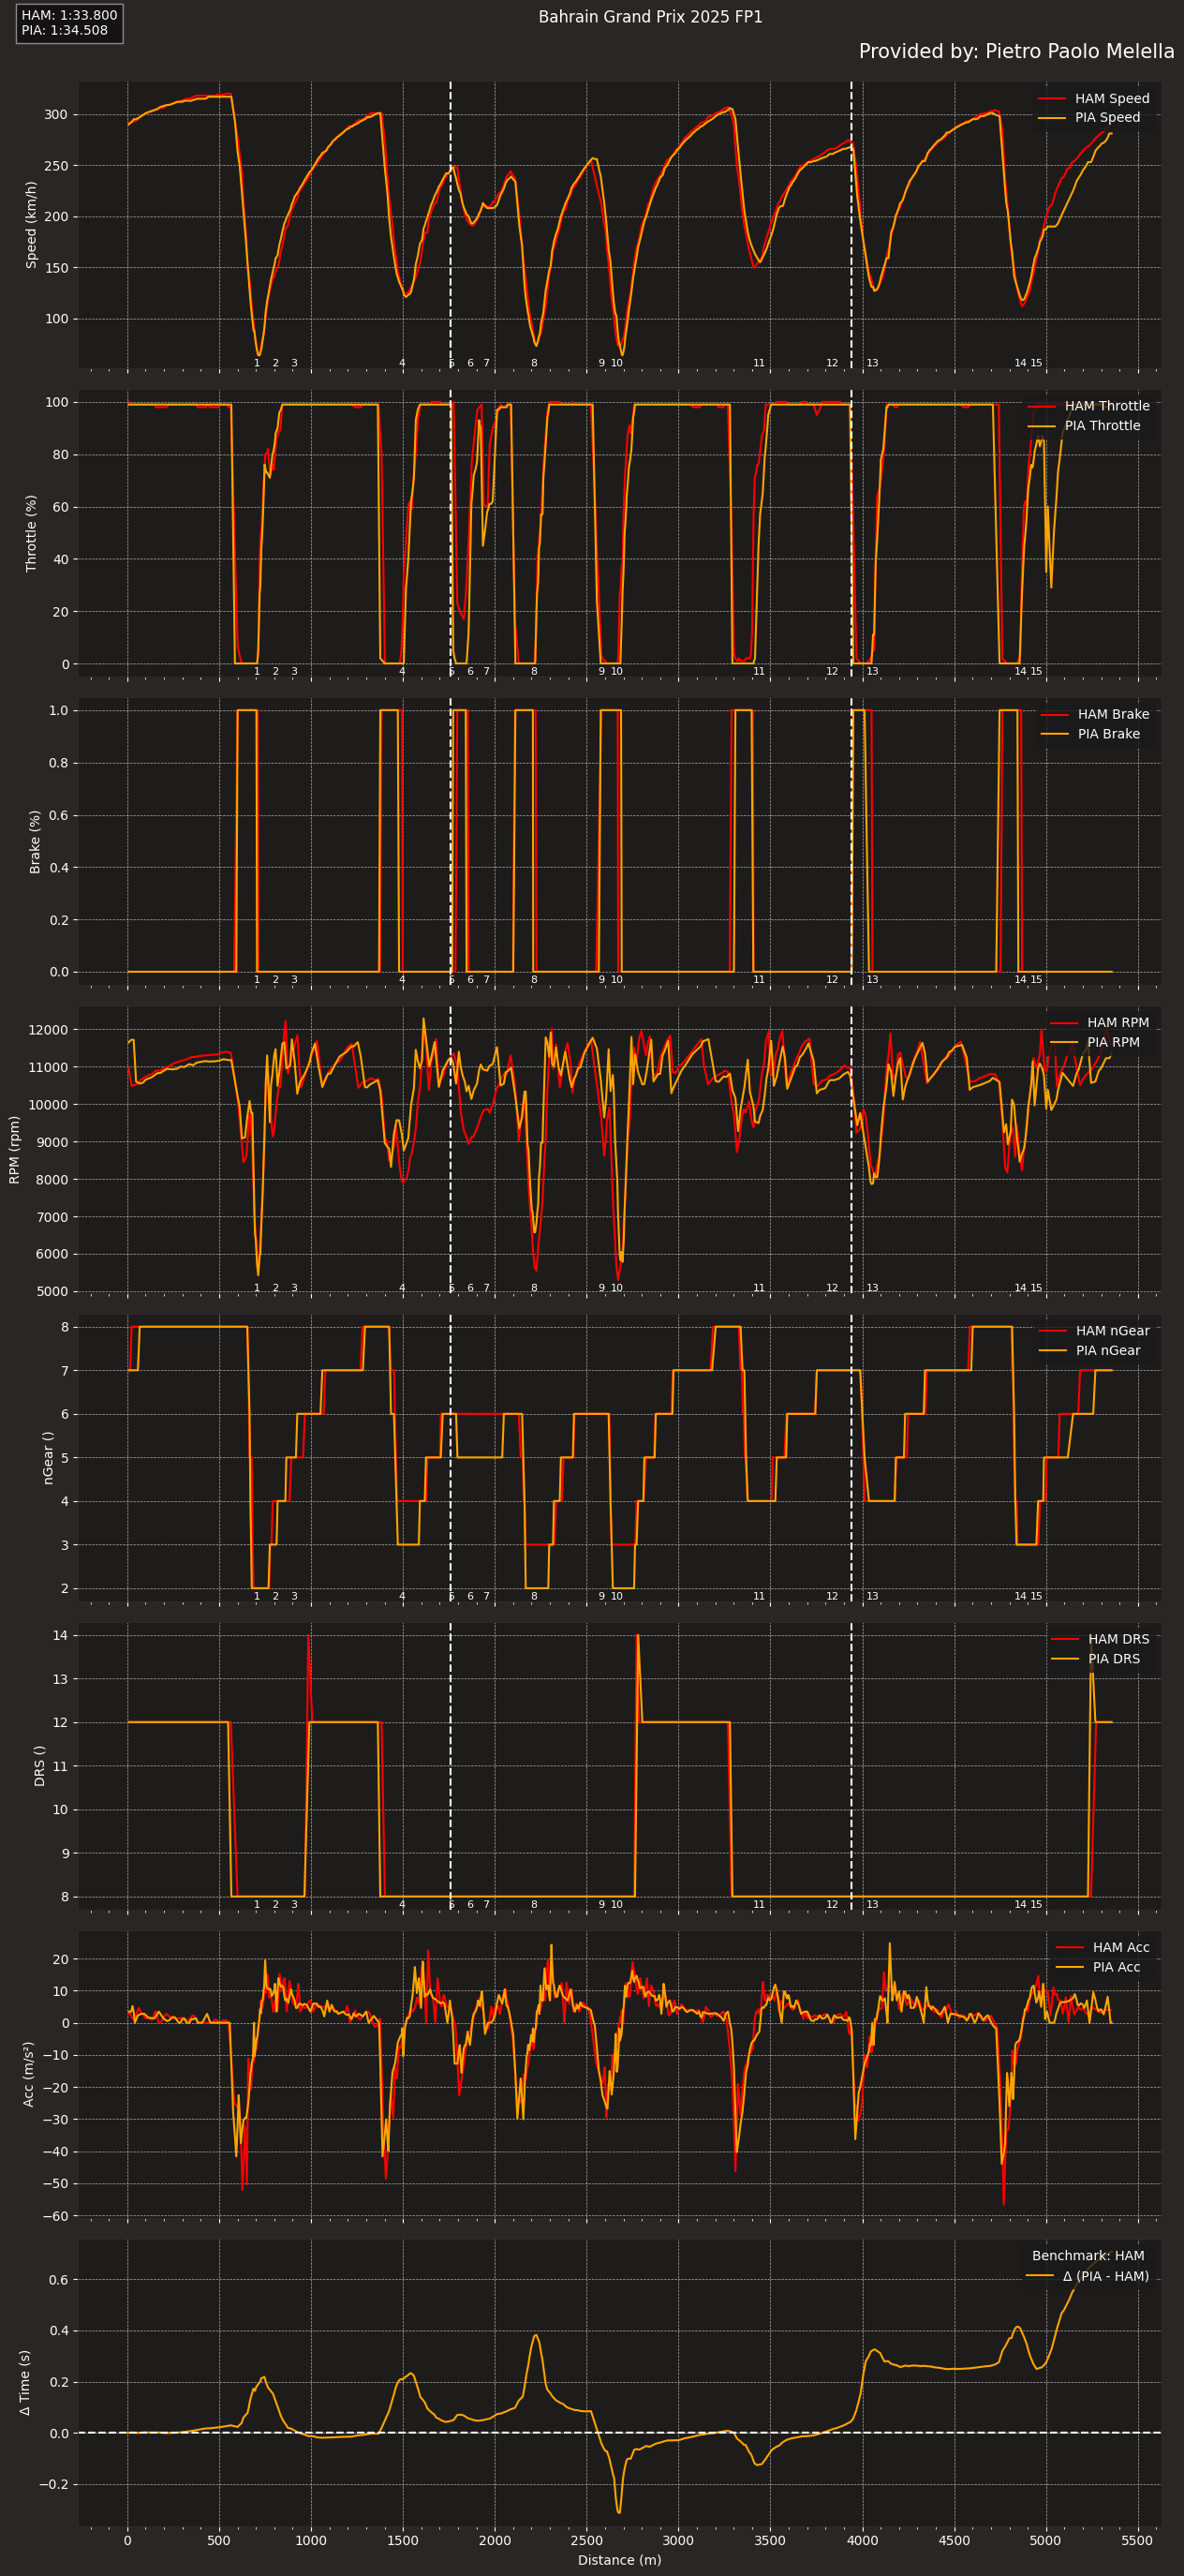

In [23]:
compare_laps(['HAM','PIA'], session_label='FP1')

In [24]:
class CornerAnalysis:
    """
    Analyze telemetry for one or more corners (or a corner range).

    Parameters:
      - drivers: list of 1-4 driver codes (e.g. ['LEC','NOR','VER','HAM'])
      - corner_idxs: int or tuple/list of two ints (1-based corner numbers)
      - before: meters before the first corner apex to include
      - after:  meters after the last corner apex to include
      - session_label: string to include in plot title (e.g. 'FP1')

    Indexing: User-provided corners are 1-based; internally converted to 0-based.

    Example:
      ca = CornerAnalysis(['LEC','NOR','VER'], corner_idxs=(6,7), before=50, after=50, session_label='FP1')
      ca.plot_all()
    """
    def __init__(self, drivers, corner_idxs, before=50, after=50, session_label=''):
        if not (1 <= len(drivers) <= 4):
            raise ValueError("drivers list must contain between 1 and 4 items")
        self.drivers = drivers
        self.before = before
        self.after = after
        self.session_label = session_label

        # Normalize user-provided corner_idxs (1-based) to zero-based indices
        if isinstance(corner_idxs, int):
            idx = corner_idxs - 1
            self.start_idx = self.end_idx = idx
        elif hasattr(corner_idxs, '__iter__') and len(corner_idxs) == 2:
            self.start_idx = corner_idxs[0] - 1
            self.end_idx   = corner_idxs[1] - 1
        else:
            raise ValueError("corner_idxs must be an int or a 2-tuple/list of ints (1-based)")

        self.telemetry = {}
        self._load_data()

        # Define a simple color palette for up to 4 drivers
        self.palette = ['red','orange'][:len(self.drivers)]

    def _load_data(self):
        """Load and interpolate fastest-lap telemetry for each driver."""
        for d in self.drivers:
            lap = transformed_laps.pick_drivers(d).pick_fastest()
            df = lap.get_car_data().add_distance()
            df = interpolate_dataframe(df)
            self.telemetry[d] = df

    def get_corner_df(self, driver):
        """
        Returns a DataFrame slice for the specified corner(s), with computed Acc.
        """
        df = self.telemetry[driver]
        corners = circuit_info.corners['Distance'].values
        start_dist = corners[self.start_idx] - self.before
        end_dist   = corners[self.end_idx]   + self.after
        dfc = df[(df['Distance'] >= start_dist) & (df['Distance'] <= end_dist)].copy()
        # compute acceleration
        dfc['Speed_ms'] = dfc['Speed'] / 3.6
        dfc['Sess_s']   = dfc['SessionTime'].dt.total_seconds()
        dfc['Acc']      = np.gradient(dfc['Speed_ms'], dfc['Sess_s'])
        return dfc

    def plot_all(self):
        """Plot Speed, Acc, Throttle, Brake for each driver over the corner region."""
        channels = ['Speed', 'Acc', 'Throttle', 'Brake']
        n = len(channels)
        fig, axs = plt.subplots(n, 1, figsize=(10, 3*n), sharex=True)
        plt.style.use('dark_background')

        # Build title string
        event = session.event['EventName']
        year  = session.event.year
        if self.start_idx == self.end_idx:
            corner_label = f"Corner {self.start_idx+1}"
        else:
            corner_label = f"Corners {self.start_idx+1}-{self.end_idx+1}"
        title = f"{event} {year} {self.session_label} {corner_label}"
        fig.suptitle(title, color='white')
        fig.subplots_adjust(top=0.90)

        # Plot each channel with dynamic colors
        for idx, ch in enumerate(channels):
            ax = axs[idx]
            for d, col in zip(self.drivers, self.palette):
                dfc = self.get_corner_df(d)
                ax.plot(dfc['Distance'], dfc[ch], color=col, label=f"{d} {ch}")
            ax.set_ylabel(ch, color='white')
            ax.legend(loc='upper right')
            ax.grid(True, linestyle='--', linewidth=0.5)
            ax.tick_params(colors='white')
            if idx == n-1:
                ax.set_xlabel('Distance (m)', color='white')
            # mark apex(es)
            corners = circuit_info.corners['Distance'].values
            for apex_idx in range(self.start_idx, self.end_idx+1):
                ax.axvline(corners[apex_idx], color='white', linestyle=':')

        # Annotate signature
        fig.text(
            0.95, 0.93,
            "Provided by: Pietro Paolo Melella",
            ha='right', va='bottom',
            color='white', fontsize=15
        )
         
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()



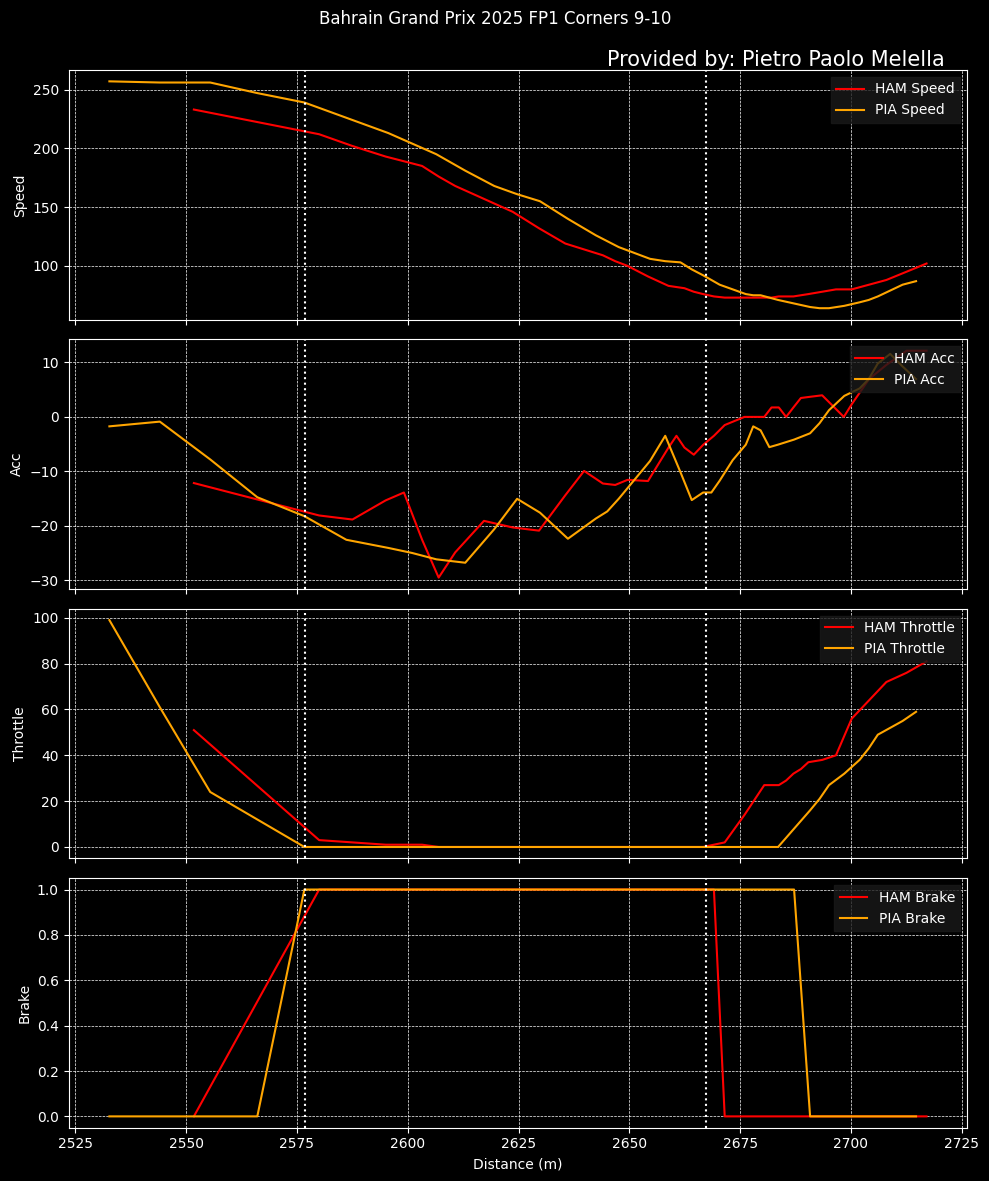

In [25]:
corners= [[9,10]]

for corner in corners:
    ca = CornerAnalysis(
        ['HAM','PIA'],    # up to 4 drivers
        corner_idxs=corner,            # 1-based corners
        before=50,
        after=50,
        session_label='FP1'
    )
    ca.plot_all()

In [26]:
class CornerSpeedComparator:
    def __init__(self, drivers, driver_color_map=None, n_interp=200, session_label=''):
        """
        :param drivers: list of driver codes, e.g. ['LEC','NOR','VER']
        :param driver_color_map: dict mapping driver codes to colors
        :param n_interp: number of points to interpolate in each corner
        """
        self.drivers = drivers
        self.driver_color_map = driver_color_map or {}
        self.n_interp = n_interp
        self._load_laps()
        self._compute_corner_windows()
        self._compute_peaks()
        self.session_label = session_label

    def _load_laps(self):
        self.lap_objs = []
        self.laps = []
        for d in self.drivers:
            lap_obj = transformed_laps.pick_drivers(d).pick_fastest()
            fl = FastestLap(lap_obj)
            fl.df = compute_acceleration(fl.df)
            self.lap_objs.append(lap_obj)
            self.laps.append(fl)

    def _compute_corner_windows(self):
        apexes = sorted(circuit_info.corners['Distance'].values)
        self.entries = [0.0] + [(apexes[i-1] + apexes[i]) / 2 for i in range(1, len(apexes))]
        self.exits = [(apexes[i] + apexes[i+1]) / 2 for i in range(len(apexes)-1)] + [
            max(fl.df['Distance'].max() for fl in self.laps)
        ]
        self.apexes = apexes

    def _compute_peaks(self):
        peak_dict, delta_dict = {}, {}
        for idx, (start, apex, end) in enumerate(
                zip(self.entries, self.apexes, self.exits), start=1):
            grid = np.linspace(start, end, self.n_interp)
            interp_speeds = {
                fl.name: np.interp(grid, fl.df['Distance'], fl.df['Speed'])
                for fl in self.laps
            }
            peaks = {name: speeds.max() for name, speeds in interp_speeds.items()}
            winner = max(peaks, key=peaks.get)
            peak_dict[f" {idx}"] = peaks
        self.df_peaks = pd.DataFrame(peak_dict).T

    def plot_peak_speeds(self, figsize=(12,6)):
        """Grouped bar chart of peak speeds per corner with vertical annotations."""
        fig, ax = plt.subplots(figsize=figsize)
        self.df_peaks.plot.bar(
            ax=ax, rot=0,
            color=[self.driver_color_map.get(d) for d in self.df_peaks.columns]
        )
        
        # Build title string
        event = session.event['EventName']
        year  = session.event.year
        ax.set_xlabel("Turn")
        ax.set_ylabel("Peak Speed (km/h)")
        ax.set_title(f"Turn Peak Speeds {event} {year} {self.session_label}")
        ax.legend(
            title="Driver",
            loc='upper left',
            bbox_to_anchor=(1.02, 1),
            fontsize=8
        )

        # Annotate each corner as a vertical list
        for i, corner in enumerate(self.df_peaks.index):
            speeds = self.df_peaks.loc[corner]
            winner = speeds.idxmax()
            win_speed = speeds[winner]
            # Build three lines: winner, then others with delta
            lines = [f"{winner}: {win_speed:.0f}"]
            for d in self.drivers:
                if d == winner:
                    continue
                diff = int(speeds[d] - win_speed)
                lines.append(f"{d}: {diff:+d}")
            text = "\n".join(lines)
            ax.text(
                i, win_speed + 3,
                text,
                ha='center', va='bottom',
                color='white', fontsize=6
            )

        # Annotate signature
        fig.text(
            0.9, 1.6,
            "Provided by: Pietro Paolo Melella",
            ha='right', va='bottom',
            color='white', fontsize=15
        )

        plt.tight_layout(rect=[0, 0, 1.3, 1.8])
        plt.show()


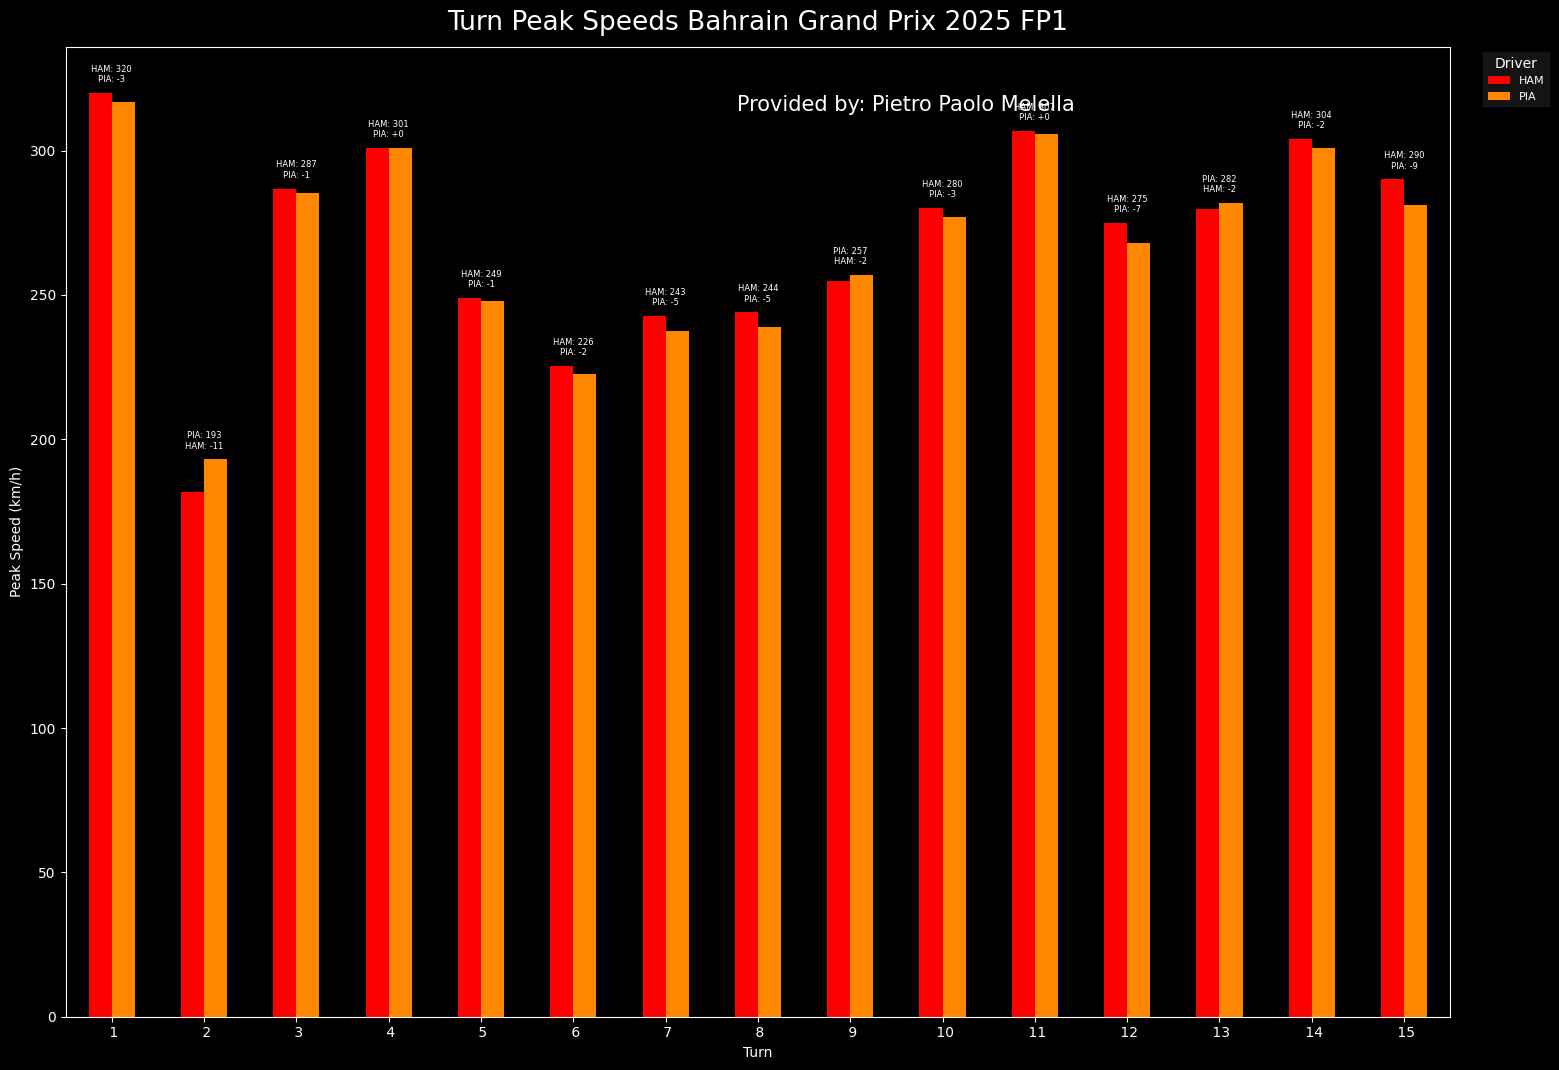

In [27]:
# define your team/driver colors if you like
colors = {'VER':'#0391cf','PIA':'#ff8700','HAM':'#ff0000'}

comp = CornerSpeedComparator(
    drivers=['HAM','PIA'],
    driver_color_map=colors,
    session_label='FP1'
)

# show absolute peaks
comp.plot_peak_speeds()

In [28]:
class FastestTurnShare:
    """
    Compute and plot the percentage share of corners each driver was fastest.
    """
    def __init__(self, drivers, session, driver_color_map=None, n_interp=200, session_label=''):
        """
        :param drivers: list of driver codes, e.g. ['LEC','NOR','VER']
        :param session:    FastF1 session object (with .event info loaded)
        :param driver_color_map: dict mapping driver codes to colors
        :param n_interp:  number of interpolation points per corner
        """
        self.drivers = drivers
        self.session = session
        self.driver_color_map = driver_color_map or {}
        self.n_interp = n_interp
        self.session_label = session_label

        # load & prepare laps
        self._load_laps()
        # derive corner windows
        self._compute_corner_windows()
        # compute peak speeds per corner
        self._compute_peaks()
    
    def _load_laps(self):
        from fastf1 import utils  # ensure fastf1 is available
        self.laps = []
        for d in self.drivers:
            lap_obj = transformed_laps.pick_drivers(d).pick_fastest()
            fl = FastestLap(lap_obj)
            fl.df = compute_acceleration(fl.df)
            self.laps.append(fl)

    def _compute_corner_windows(self):
        apexes = sorted(circuit_info.corners['Distance'].values)
        # entry points are midpoints, start at 0
        self.entries = [0.0] + [(apexes[i-1] + apexes[i])/2 for i in range(1, len(apexes))]
        # exit points are midpoints, end at max distance
        self.exits   = [(apexes[i] + apexes[i+1])/2 for i in range(len(apexes)-1)] + \
                       [max(fl.df['Distance'].max() for fl in self.laps)]
        self.apexes = apexes

    def _compute_peaks(self):
        peak_dict = {}
        for idx, (start, apex, end) in enumerate(zip(self.entries, self.apexes, self.exits), start=1):
            grid = np.linspace(start, end, self.n_interp)
            speeds = {
                fl.name: np.interp(grid, fl.df['Distance'], fl.df['Speed'])
                for fl in self.laps
            }
            peaks = {name: sp.max() for name, sp in speeds.items()}
            peak_dict[f"Turn {idx}"] = peaks
        # DataFrame: index=Turn 1, Turn 2..., columns=drivers
        self.df_peaks = pd.DataFrame(peak_dict).T

    def plot_share(self, figsize=(6,6)):
        """
        Render a pie chart of percent share of corners won (fastest) by each driver.
        """
        # find per-turn winners
        winners = self.df_peaks.idxmax(axis=1)
        counts = winners.value_counts().reindex(self.drivers, fill_value=0)
        labels = counts.index.tolist()
        sizes  = counts.values.tolist()
        colors = [self.driver_color_map.get(d) for d in labels]

        fig, ax = plt.subplots(figsize=figsize)
        ax.pie(
            sizes,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=90
        )
        title = f"{self.session.event['EventName']} {self.session.event.year} {self.session_label}"
        ax.set_title(f"{title}\nFastest-Turn Share")

        # Annotate signature
        fig.text(
            0.9, 0.8,
            "Provided by: Pietro Paolo Melella",
            ha='right', va='bottom',
            color='white', fontsize=15
        )

        plt.tight_layout()
        plt.show()

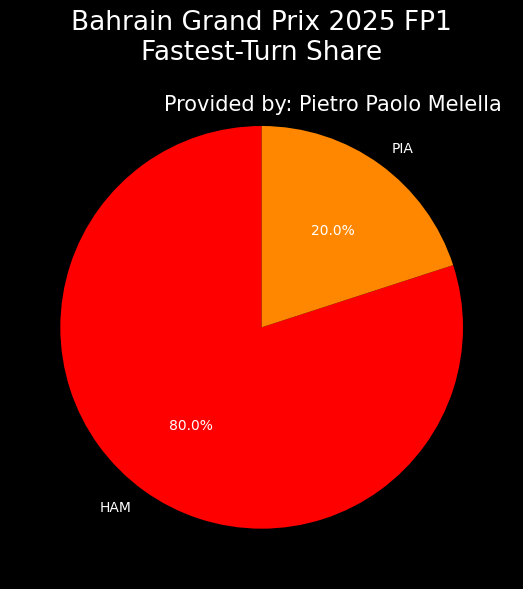

In [30]:
colors = {'VER':'#0391cf', 'PIA':'#ff8700', 'HAM':'#ff0000'}

share = FastestTurnShare(
    drivers=['HAM','PIA'],
    session=session,
    driver_color_map=colors,
    session_label='FP1'
)
share.plot_share()